<a href="https://colab.research.google.com/github/ADinng/CS6319_MachineLearning/blob/main/CS6319_machinelearning_lecture1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  lecture 01
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

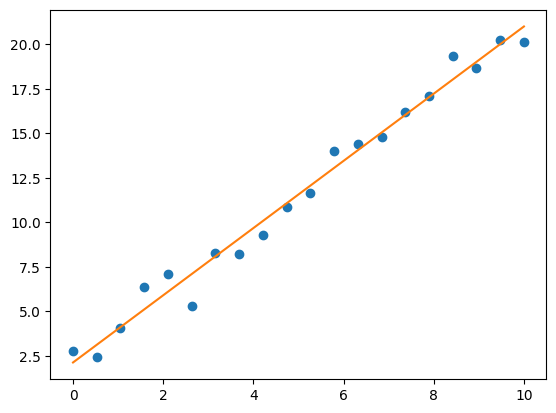

In [ ]:
# Linear regression
np.random.seed(0)
n = 20 #n is the number of data points (20)
x = np.linspace(0, 10, n)
y = x*2 + 1 + np.random.randn(n) # y=2x+1


linreg = LinearRegression()
linreg.fit(x[:,np.newaxis], y)
yfit = linreg.predict(np.transpose([x]))


plt.plot(x, y, 'o')
plt.plot(x, yfit)


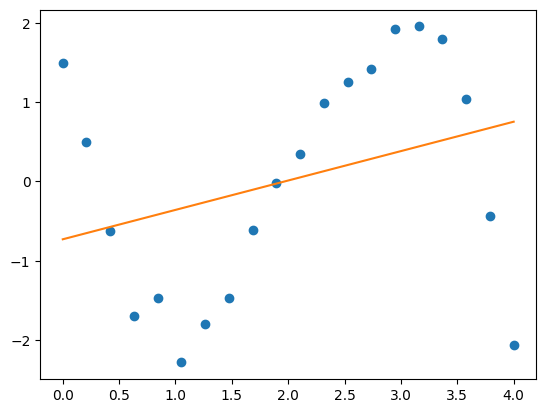

In [ ]:
# lecture 02 0115/2025
# Polynomial regression, under- and overfitting
n=20
x=np.linspace(0, 4, n)
y=-x*x*x + 6*x*x -9*x + 2 + 0.2 * np.random.randn(n)

linreg.fit(np.transpose([x]),y)
yfit=linreg.predict(np.transpose([x]))

# underfifitting
plt.plot(x, y,'o')
plt.plot(x, yfit)

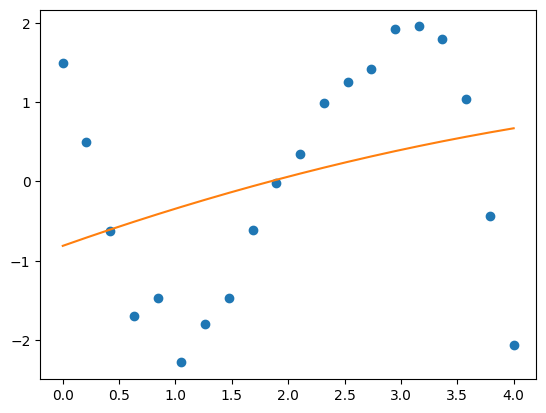

In [ ]:
linreg.fit(np.transpose([x,x*x]),y)
yfit=linreg.predict(np.transpose([x,x*x]))

# again badly underfitting the data.
plt.plot(x, y,'o')
plt.plot(x, yfit)

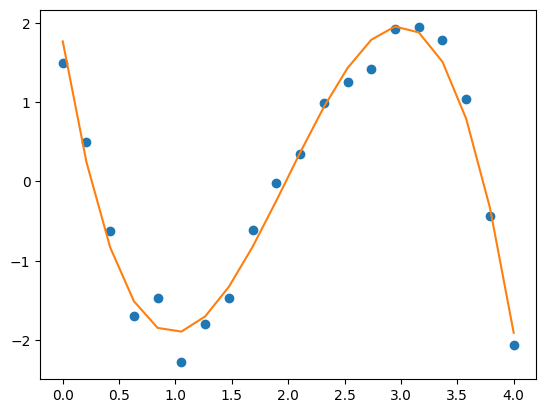

In [ ]:
linreg.fit(np.transpose([x,x*x,x*x*x]),y)
yfit=linreg.predict(np.transpose([x,x*x,x*x*x]))

# overfitting
plt.plot(x, y,'o')
plt.plot(x, yfit)

In [ ]:
import pandas as pd

# housing = pd.read_csv("/content/house-prices.csv")
housing = pd.read_csv("https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.csv")
housing.head()
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='longitude', ylabel='latitude'>

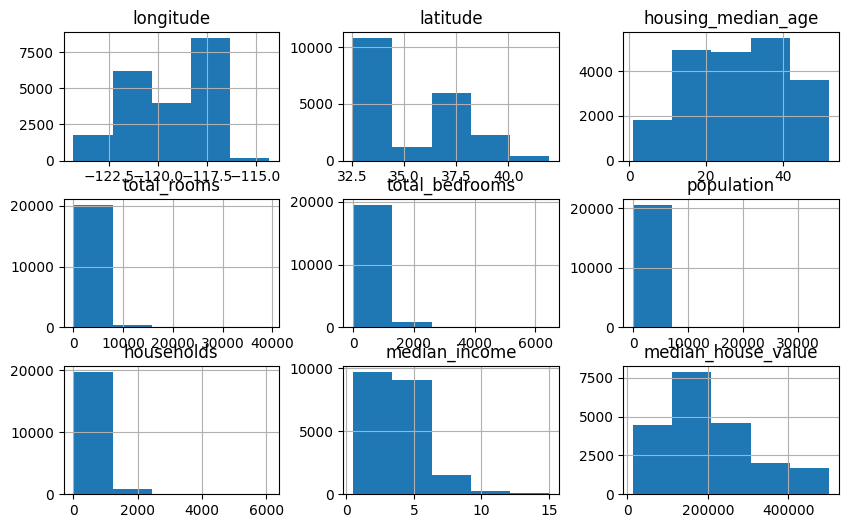

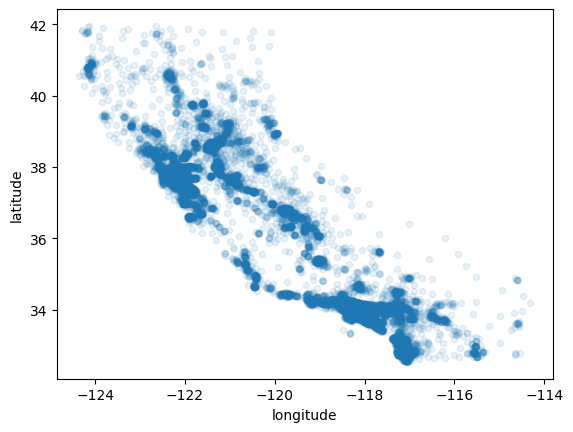

In [ ]:
housing.hist(bins=5, figsize=(10, 6))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
# Data Preprocessing
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(housing, test_size=0.2)
print(trainset)
print(testset)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14763    -117.10     32.59                21.0       2350.0           667.0   
188      -122.24     37.79                39.0       1469.0           431.0   
3265     -122.95     39.13                17.0        380.0            69.0   
19990    -119.32     36.19                11.0       3136.0           620.0   
5027     -118.34     33.99                46.0       1217.0           322.0   
...          ...       ...                 ...          ...             ...   
12372    -116.40     33.78                 8.0       3059.0           500.0   
16298    -121.22     37.96                31.0       1484.0           314.0   
19340    -122.87     38.61                23.0       2676.0           521.0   
9781     -121.13     36.20                16.0       1868.0           443.0   
19043    -121.76     38.41                19.0        686.0           107.0   

       population  households  median_income  media

In [ ]:
# 01.21 2025 Lecture 03

print(trainset.columns)
traindata = trainset.drop("median_house_value", axis=1)
trainlabs = trainset["median_house_value"].copy()

print(trainset)
print("===============================")
print(traindata)
print("===============================")
print(trainlabs)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14763    -117.10     32.59                21.0       2350.0           667.0   
188      -122.24     37.79                39.0       1469.0           431.0   
3265     -122.95     39.13                17.0        380.0            69.0   
19990    -119.32     36.19                11.0       3136.0           620.0   
5027     -118.34     33.99                46.0       1217.0           322.0   
...          ...       ...                 ...          ...             ...   
12372    -116.40     33.78                 8.0       3059.0           500.0   
16298    -121.22     37.96                31.0       1484.0           314.0   
19340    -122.87     38.61                23.0       2676.0           521.0   


In [ ]:
# separate categorical and numerical attributes
traincat = traindata[["ocean_proximity"]]
trainnum = traindata.drop("ocean_proximity", axis=1)
print(traincat)
print("====================")
print(trainnum)


      ocean_proximity
14763      NEAR OCEAN
188          NEAR BAY
3265           INLAND
19990          INLAND
5027        <1H OCEAN
...               ...
12372          INLAND
16298          INLAND
19340       <1H OCEAN
9781        <1H OCEAN
19043          INLAND

[16512 rows x 1 columns]
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14763    -117.10     32.59                21.0       2350.0           667.0   
188      -122.24     37.79                39.0       1469.0           431.0   
3265     -122.95     39.13                17.0        380.0            69.0   
19990    -119.32     36.19                11.0       3136.0           620.0   
5027     -118.34     33.99                46.0       1217.0           322.0   
...          ...       ...                 ...          ...             ...   
12372    -116.40     33.78                 8.0       3059.0           500.0   
16298    -121.22     37.96                31.0       1484.0           314.0   

In [ ]:
# Handling missing values
from sklearn.impute import SimpleImputer
#  Imptuation
imputer = SimpleImputer(strategy="median")

imputer.fit(trainnum)
x = imputer.transform(trainnum)
trainnum= pd.DataFrame(x, columns=trainnum.columns)

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # 选择一种方法进行数据缩放

# # 方法 1: MinMaxScaler (将值缩放到 [0, 1])
# scaler = MinMaxScaler()
# trainnum = pd.DataFrame(scaler.fit_transform(trainnum), columns=trainnum.columns)

# # 方法 2: StandardScaler (将数据标准化为均值 0 和标准差 1)
# scaler = StandardScaler()
# trainnum = pd.DataFrame(scaler.fit_transform(trainnum), columns=trainnum.columns)

scaler = StandardScaler()
trainnums = scaler.fit_transform(trainnum)


In [ ]:
# Regression on the numerical attributes
# import
linreg = LinearRegression()
linreg.fit(trainnums, trainlabs)
predictions=linreg.predict(trainnums)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(trainlabs, predictions)
rmse = np.sqrt(mse)
print("Train numerics LIN error = ", rmse)

Train numerics LIN error =  69082.78464568175


In [ ]:
# Combining numerical attributes

trainnum["rooms_per_household"]=trainnum["total_rooms"]/trainnum["households"]

trainnum["bedrooms_per_room"]= trainnum["total_bedrooms"]/trainnum["total_rooms"]

trainnum["population_per_household"]=trainnum["population"]/trainnum["households"]

In [ ]:
imputer.fit(trainnum)
X = imputer.transform(trainnum)

trainnum = pd.DataFrame(X, columns=trainnum.columns)
trainnumr = scaler.fit_transform(trainnum)

In [ ]:
linreg.fit(trainnumr, trainlabs)
predictions = linreg.predict(trainnumr)
mse = mean_squared_error(trainlabs, predictions)
rmse = np.sqrt(mse)
print("Train extended numericas LIN error = ", rmse)

Train extended numericas LIN error =  68559.36183563367


In [ ]:
corr_matrix=trainset.drop("ocean_proximity", axis=1).corr()
print(corr_matrix["median_house_value"])

longitude            -0.047998
latitude             -0.143619
housing_median_age    0.111647
total_rooms           0.140739
total_bedrooms        0.055268
population           -0.018309
households            0.071222
median_income         0.693173
median_house_value    1.000000
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

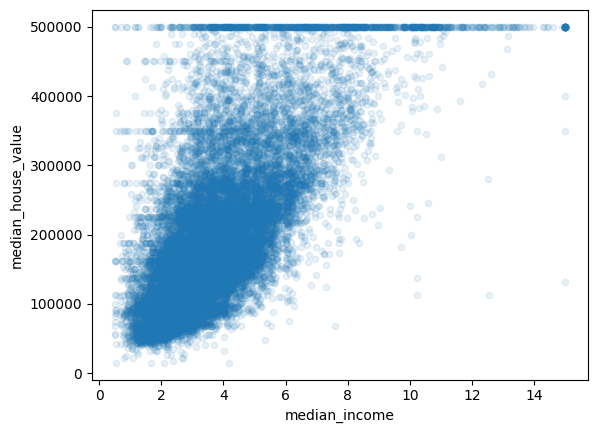

In [ ]:
housing.plot(x="median_income", y="median_house_value", kind="scatter", alpha=0.1)

In [ ]:
trainnum1 = trainnumr[:, [1, 2, 3, 7, 9, 10]]
linreg.fit(trainnum1, trainlabs)
predictions = linreg.predict(trainnum1)
mse = mean_squared_error(trainlabs, predictions)
rmse = np.sqrt(mse)
print("Train selected numericas LIN error = ", rmse)

Train selected numericas LIN error =  77316.06904450871


In [ ]:
# 01.22 2025 lecture 04
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
trainhot = cat_encoder.fit_transform(traincat).toarray()

In [ ]:
trainnew = np.concatenate([trainnumr, trainhot], axis=1)

In [ ]:
linreg.fit(trainnew, trainlabs)
predictions = linreg.predict(trainnew)
mse = mean_squared_error(trainlabs, predictions)
rmse = np.sqrt(mse)
print("Train combined arrributes LIN error = ", rmse)

Train combined arrributes LIN error =  67765.74947521035


In [ ]:
# decsion tree

from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor()
treereg.fit(trainnew, trainlabs)
predictions = treereg.predict(trainnew)
mse = mean_squared_error(trainlabs, predictions)
rmse = np.sqrt(mse)
print("Train combined attributes DT error = ", rmse)

Train combined attributes DT error =  0.0


In [ ]:
testdata = testset.drop("median_house_value", axis=1)
testlabs = testset["median_house_value"].copy()

testnum = testdata.drop("ocean_proximity", axis=1)
testcat = testdata[["ocean_proximity"]]

testnum["rooms_per_household"] = testnum["total_rooms"]/testnum["households"]
testnum["bedrooms_per_room"] = testnum["total_bedrooms"]/testnum["total_rooms"]
testnum["population_per_household"] = testnum["population"] / testnum["households"]

X = imputer.transform(testnum)
testnum = pd.DataFrame(X, columns=testnum.columns)

testnumr = scaler.transform(testnum)

testhot = cat_encoder.fit_transform(testcat).toarray()
testnew = np.concatenate([testnumr, testhot], axis=1)

predictins = treereg.predict(testnew)
mse = mean_squared_error(testlabs, predictions)
rmse = np.sqrt(mse)
print("Test combined attributes DT error = ", rmse)
